<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Tugas Mandiri
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

Nama : Didin Nur Yahya
Kelas : 4IA07
NPM : 51419788

### Pertemuan 4 - Semester 8

1. Buatlah model klasifikasi dengan machine learning dari dataset yang diberikan dengan ketentuan :
    - Gunakan metode CRISP-DM secara terurut dan lengkap
    - Gunakan algoritma linear regression, logistic regression, dan K-NN

2. Dari ketiga algoritma yang anda pakai, algoritma yang manakah yang memiliki akurasi paling tinggi?

In [2]:
# 1. Import Library Pandas
import pandas as pd

In [3]:
# 2. Memuat Data
df = pd.read_csv('dataset_tm_10k.csv')

In [4]:
# 3. Menampilkan 5 baris pertama dari dataset
df.head(5)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,NaN,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [5]:
# 4. Menampilkan 10 baris pertama dari dataset
df.head(10)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,NaN,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1
5,3641.0,1045.0,160.0,MQ,MIA,CMH,1,0
6,138.0,1160.0,185.0,WN,BDL,MCO,7,0
7,586.0,700.0,142.0,AS,PDX,SNA,2,1
8,5220.0,895.0,102.0,EV,AEX,ATL,2,0
9,5122.0,516.0,137.0,EV,DTW,MCI,7,0


In [6]:
# 5. enampilkan 5 baris terakhir dari dataset
df.tail()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
10782,2821.0,610.0,50.0,MQ,DFW,SPS,2,0
10783,2618.0,839.0,118.0,XE,SDF,EWR,2,0
10784,1973.0,1160.0,124.0,DL,ATL,MIA,2,0
10785,528.0,1275.0,112.0,US,PHX,RNO,4,0
10786,2254.0,970.0,NaN,DL,ATL,CMH,4,1


In [7]:
# 7. Mengetahui jumlah baris dan kolom memanfaatkan fungsi shape
df.shape

(10787, 8)

In [8]:
# 8. Mengetahui jumlah baris dan kolom memanfaatkan fungsi shape
print("Jumlah Baris : ", df.shape[0])
print("Jumlah Kolom : ", df.shape[1])

Jumlah Baris :  10787
Jumlah Kolom :  8


In [9]:
# 9. Mengetahui tipe data pada dataset
df.dtypes

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [10]:
# 10. Menampilkan statistik kolom
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,10787.000000,9914.000000,9444.000000,10787.000000,10787.000000
mean,2435.506999,803.378253,133.429161,3.895430,0.447576
std,2071.935213,276.880784,71.861876,1.923294,0.497267
min,1.000000,15.000000,29.000000,1.000000,0.000000
25%,720.000000,570.000000,81.000000,2.000000,0.000000
50%,1798.000000,795.000000,116.000000,4.000000,0.000000
75%,3785.500000,1034.000000,164.000000,5.000000,1.000000
max,7812.000000,1439.000000,655.000000,7.000000,1.000000


In [11]:
# 11. Menampilkan statistik kolom baik yang bertipe numerik dan non numerik menggunakan fungsi describe
df.describe(include='all')

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
count,10787.000000,9914.000000,9444.000000,10205,10787,10787,10787.000000,10787.000000
unique,NaN,NaN,NaN,18,270,265,NaN,NaN
top,NaN,NaN,NaN,WN,ATL,ATL,NaN,NaN
freq,NaN,NaN,NaN,1795,687,708,NaN,NaN
mean,2435.506999,803.378253,133.429161,NaN,NaN,NaN,3.895430,0.447576
std,2071.935213,276.880784,71.861876,NaN,NaN,NaN,1.923294,0.497267
min,1.000000,15.000000,29.000000,NaN,NaN,NaN,1.000000,0.000000
25%,720.000000,570.000000,81.000000,NaN,NaN,NaN,2.000000,0.000000
50%,1798.000000,795.000000,116.000000,NaN,NaN,NaN,4.000000,0.000000
75%,3785.500000,1034.000000,164.000000,NaN,NaN,NaN,5.000000,1.000000


In [12]:
q1 = df.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1
iqr

Flight       3065.5
Time          464.0
Length         83.0
DayOfWeek       3.0
Class           1.0
dtype: float64

In [13]:
# 12. Melihat batas bawah/minimum dari Interquartile Range (IQR)
batas_bawah = q1 - (1.5 * iqr)
batas_bawah

Flight      -3878.25
Time         -126.00
Length        -43.50
DayOfWeek      -2.50
Class          -1.50
dtype: float64

In [14]:
# 13. Melihat batas atas/maksimum dari Iterquartile Range (IQR)
batas_atas = q3 + (1.5 * iqr)
batas_atas

Flight       8383.75
Time         1730.00
Length        288.50
DayOfWeek       9.50
Class           2.50
dtype: float64

In [15]:
# 14. Menampung kolom dengan tipe data selain object
df_ex_object = df.select_dtypes(exclude=['object'])

In [16]:
# 15. Filter outlier pada dataset dengan batas bawah dan atas
outlier_filter = ((df_ex_object < batas_bawah) | (df_ex_object > batas_atas))
outlier_filter

,Flight,Time,Length,DayOfWeek,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
10782,False,False,False,False,False
10783,False,False,False,False,False
10784,False,False,False,False,False
10785,False,False,False,False,False


In [17]:
## 16. Menghitung Jumlah Outlier Pada Data
for col in outlier_filter.columns :
    
    # Exclude kolom dengan tipe data object     
    if df[col].dtype != 'object' :
        print('Nama Kolom:',col)
        print(outlier_filter[col].value_counts())
        print('-------------------')

Nama Kolom: Flight
False    10787
Name: Flight, dtype: int64
-------------------
Nama Kolom: Time
False    10787
Name: Time, dtype: int64
-------------------
Nama Kolom: Length
False    10305
True       482
Name: Length, dtype: int64
-------------------
Nama Kolom: DayOfWeek
False    10787
Name: DayOfWeek, dtype: int64
-------------------
Nama Kolom: Class
False    10787
Name: Class, dtype: int64
-------------------


In [18]:
# 17. Persentase Outliers
length_outliers_percentage = len(outlier_filter[outlier_filter.Length==True]) / len(df['Length']) * 100
length_outliers_percentage

4.4683415222026515

In [19]:
# 18. Analisa standar deviasi panjang penerbangan masing-masing maskapai dengan Groupby
df.groupby('Airline')['Length'].std()

Airline
9E     24.875878
AA     78.526423
AS     88.820168
B6     84.098211
CO     83.818790
DL     74.778749
EV     27.575863
F9     44.830826
FL     41.401125
HA    104.737861
MQ     35.772763
OH     33.616975
OO     41.266610
UA     93.873549
US     77.540757
WN     60.650822
XE     36.938267
YV     40.076336
Name: Length, dtype: float64

In [20]:
# 19. Analisa jumlah delay masing-masing maskapai dengan Groupby
df.groupby('Airline')['Class'].sum()

Airline
9E     153
AA     354
AS      71
B6     142
CO     241
DL     510
EV     225
F9      46
FL     127
HA      35
MQ     240
OH      69
OO     427
UA     146
US     239
WN    1268
XE     215
YV      77
Name: Class, dtype: int64

In [21]:
# 20. Analisa jumlah delay dari masing-masing hari dengan Groupby
df.groupby('DayOfWeek')['Class'].sum()

DayOfWeek
1    686
2    661
3    859
4    834
5    701
6    438
7    649
Name: Class, dtype: int64

In [22]:
# Import Library

# 21. Import Numpy
import numpy as np

# 22. Import Pyplot from Matplotlib
import matplotlib.pyplot as plt

# 23. Import Seaborn
import seaborn as sns

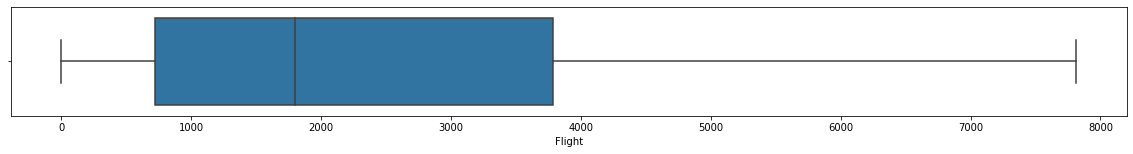

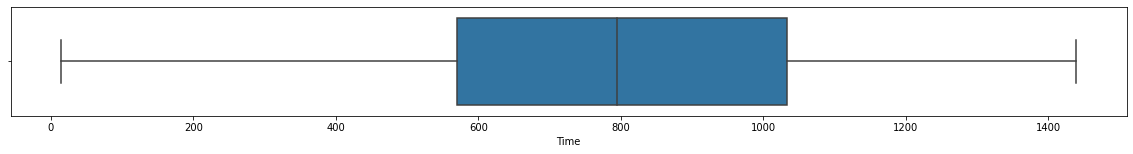

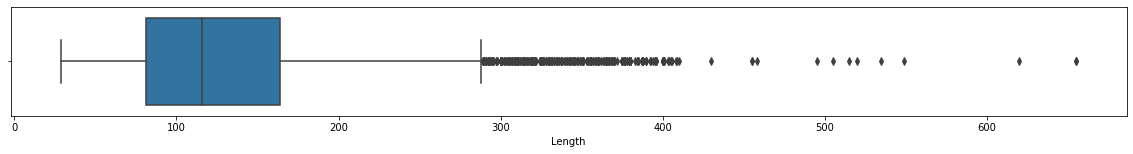

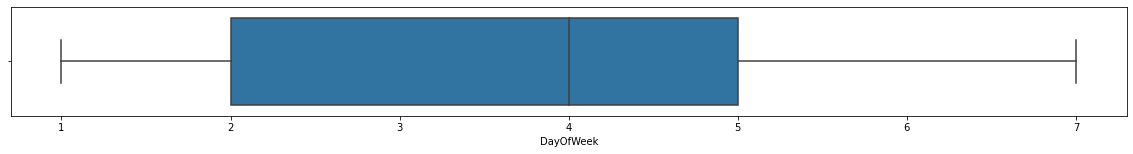

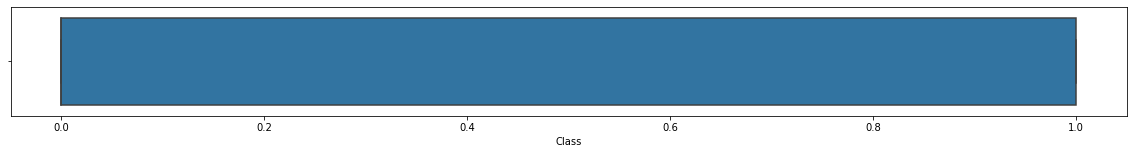

In [23]:
# Mencari Outliers - Boxplot

# 24. Exclude object data type columns
df_outlier = df.select_dtypes(exclude='object')
# Plot boxplot for each column
for column in df_outlier:
    plt.figure(figsize=(20, 2))
    sns.boxplot(data=df_outlier, x=column)

/tmp/ipykernel_215048/3493561368.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Airline_Delay_Count = df.groupby('Airline').sum()['Class'].sort_values(ascending=False)


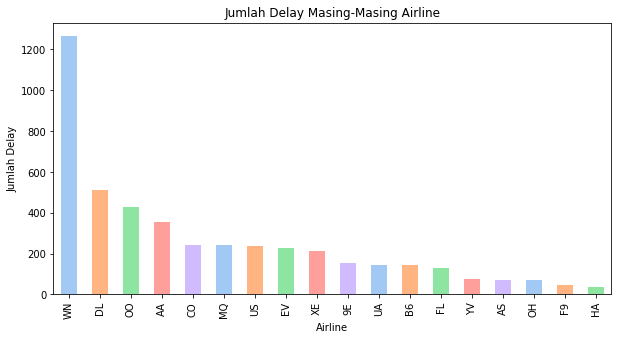

In [24]:
# Analisa jumlah delay masing-masing maskapai 

# 25. Sum the values in the 'Class' column for each airline group, and sort the airlines based on the sum in descending order
Airline_Delay_Count = df.groupby('Airline').sum()['Class'].sort_values(ascending=False)
plt.figure(figsize=(10, 5))

# Define color palette
myColors = sns.color_palette('pastel')[0:5]
# Plot the data
Airline_Delay_Count.plot(kind='bar', color=myColors)
plt.ylabel('Jumlah Delay')
plt.title('Jumlah Delay Masing-Masing Airline')
plt.show()

In [25]:
# 26. Analisa Hari dengan delay - Groupby
delay_per_day = df.groupby(['DayOfWeek', 'Class']).count().unstack('Class')['Time']
delay_per_day

Class,0,1
DayOfWeek,,
1,743,631
2,755,609
3,848,778
4,901,757
5,890,650
6,641,414
7,684,613


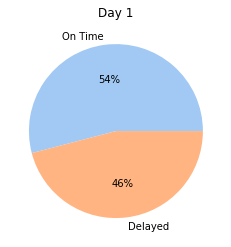

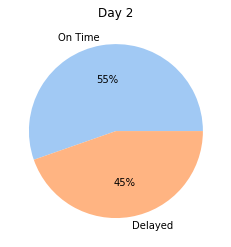

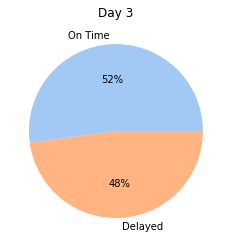

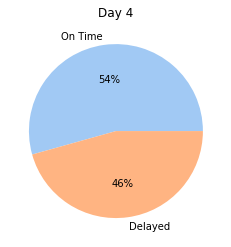

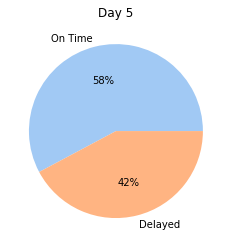

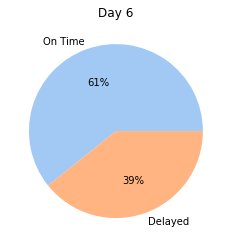

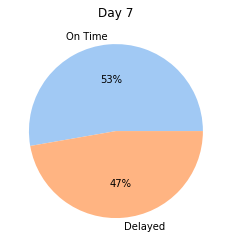

In [26]:
# 28. Label Pie Chart
pieChartLabels = ['On Time','Delayed']

#Menentukan warna pale
myColors = sns.color_palette('pastel')

#Menampilkan pie chart untuk 1 minggu   
for i in range(1,8):
    b = delay_per_day.iloc[i-1,:]
    #create pie chart
    plt.pie(b, labels = pieChartLabels, colors = myColors, autopct='%.0f%%')
    plt.title('Day ' + str(i))
    plt.show()

In [27]:
# 29. Melihat korelasi antara kolom
df.select_dtypes(exclude="object").corr()

,Flight,Time,Length,DayOfWeek,Class
Flight,1.000000,-0.002933,-0.341742,0.011387,-0.046805
Time,-0.002933,1.000000,-0.013385,0.007768,0.136350
Length,-0.341742,-0.013385,1.000000,0.002753,0.039975
DayOfWeek,0.011387,0.007768,0.002753,1.000000,-0.020370
Class,-0.046805,0.136350,0.039975,-0.020370,1.000000


<AxesSubplot:>

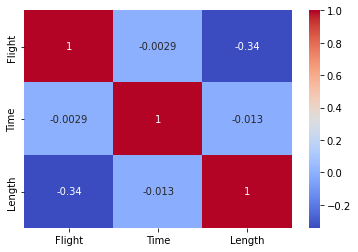

In [28]:
## 30. Melihat korelasi dengan Seaborn heatmap
sns.heatmap(df.select_dtypes(include='float').corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

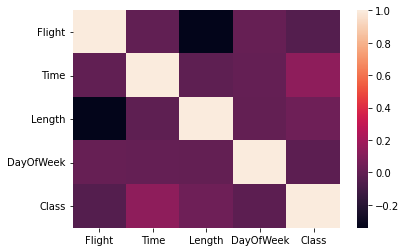

In [29]:
## 30. Melihat korelasi dengan Seaborn heatmap
sns.heatmap(df.select_dtypes(exclude=['object']).corr())

In [30]:
Data Preparation Phrase 1 & 2

SyntaxError: invalid syntax (1008090744.py, line 1)

In [31]:
# Menampilkan 5 baris teratas dari dataset 
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,NaN,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [32]:
# Membuang kolom Flight menggunakan fungsi iloc
df_drop1 = df.iloc[:,1:8]

In [33]:
df_drop1.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,870.0,180.0,NaN,IAH,PHX,5,0
1,365.0,66.0,OO,DSM,MKE,2,0
2,740.0,257.0,DL,SEA,CVG,7,0
3,595.0,235.0,WN,SNA,MDW,7,1
4,530.0,133.0,CO,IAH,MCO,6,1


In [34]:
# Membuang kolom Flight dengan fungsi drop - memuat dataset
df_drop2 = pd.read_csv('delay_maskapai.csv')

In [35]:
# Membuang kolom flight dengan fungsi drop
df_drop2.drop(['Flight'],axis=1,inplace=True)

In [36]:
#Import Library
import numpy as np

In [37]:
unique_id = np.random.choice(len(df),size=len(df),replace=False)

In [38]:
df['unique_id'] = unique_id

In [39]:
df['unique_id'].is_unique

True

In [40]:
df_index = df.set_index('unique_id')

In [41]:
df_index.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
unique_id,,,,,,,,
2585,320.0,870.0,180.0,NaN,IAH,PHX,5,0
2361,3045.0,365.0,66.0,OO,DSM,MKE,2,0
5023,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3062,1156.0,595.0,235.0,WN,SNA,MDW,7,1
7167,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [42]:
Time = pd.to_datetime(df.Time, unit='m').dt.strftime('%H.%M')

In [43]:
df['DepartTime'] = Time 

In [44]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,unique_id,DepartTime
0,320.0,870.0,180.0,NaN,IAH,PHX,5,0,2585,14.30
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0,2361,06.05
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0,5023,12.20
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1,3062,09.55
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1,7167,08.50


In [45]:
Time_Class_Sum = df.groupby('DepartTime').sum(numeric_only=True)['Class'].sort_index()
Time_Class_Sum.head()

DepartTime
00.15    1
00.30    0
00.35    1
00.40    1
00.49    0
Name: Class, dtype: int64

In [46]:
Time_Class_Sum.sort_values(ascending=False).head(20)

DepartTime
06.00    42
07.00    37
19.00    36
17.00    35
12.00    34
19.05    33
16.00    33
11.40    32
14.45    31
12.05    31
10.00    30
11.45    29
17.30    29
18.15    28
15.30    28
11.55    27
20.00    27
15.15    27
19.10    27
17.35    27
Name: Class, dtype: int64

In [47]:
import matplotlib.pyplot as plt

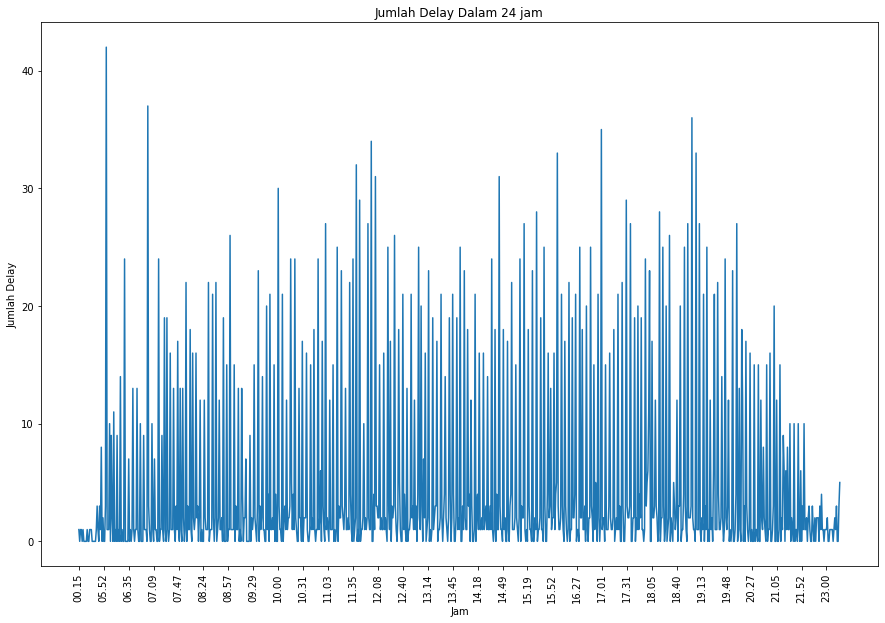

In [48]:
# Mengatur ukuran gambar
plt.figure(figsize=(15, 10))

# Melakukan plot data
Time_Class_Sum.plot()

# Mengatur label sumbu x
ticks = range(0, len(Time_Class_Sum.index), 30)  # Menentukan posisi label setiap setengah jam
labels = Time_Class_Sum.index[ticks]  # Mengambil label berdasarkan posisi
plt.xticks(rotation=90) # Mengatur posisi rotasi label pada sumbu x
plt.xticks(ticks, labels)  # Mengatur posisi dan label pada sumbu x

# Mengatur label sumbu y dan judul grafik
plt.xlabel('Jam')
plt.ylabel('Jumlah Delay')
plt.title('Jumlah Delay Dalam 24 jam')

# Menampilkan grafik
plt.show()


In [49]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,unique_id,DepartTime
0,320.0,870.0,180.0,NaN,IAH,PHX,5,0,2585,14.30
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0,2361,06.05
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0,5023,12.20
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1,3062,09.55
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1,7167,08.50


In [50]:
df_rename_col = df.rename(columns={"Time":"DepartTime"})

In [51]:
df_rename_col.head()

,Flight,DepartTime,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,unique_id,DepartTime
0,320.0,870.0,180.0,NaN,IAH,PHX,5,0,2585,14.30
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0,2361,06.05
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0,5023,12.20
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1,3062,09.55
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1,7167,08.50


In [52]:
# 3. Menampilkan 5 baris teratas dari dataset 
df.head(5)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,unique_id,DepartTime
0,320.0,870.0,180.0,NaN,IAH,PHX,5,0,2585,14.30
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0,2361,06.05
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0,5023,12.20
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1,3062,09.55
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1,7167,08.50


In [53]:
# 6. Pada variabel df_drop1 pilihlah hanya kolom Airline, AirportFrom, AirportTo
df_drop1 = df.iloc[:,[3,4,5]] 

In [54]:
df_drop1.head()

,Airline,AirportFrom,AirportTo
0,NaN,IAH,PHX
1,OO,DSM,MKE
2,DL,SEA,CVG
3,WN,SNA,MDW
4,CO,IAH,MCO


In [55]:
df_index = df.set_index('Airline')

In [56]:
df_index.head()

,Flight,Time,Length,AirportFrom,AirportTo,DayOfWeek,Class,unique_id,DepartTime
Airline,,,,,,,,,
NaN,320.0,870.0,180.0,IAH,PHX,5,0,2585,14.30
OO,3045.0,365.0,66.0,DSM,MKE,2,0,2361,06.05
DL,1560.0,740.0,257.0,SEA,CVG,7,0,5023,12.20
WN,1156.0,595.0,235.0,SNA,MDW,7,1,3062,09.55
CO,1873.0,530.0,133.0,IAH,MCO,6,1,7167,08.50


In [57]:
# 13. Mengubah format kolom Time ke dalam Jam dan Menit
Time = pd.to_datetime(df_index.Time, unit='m').dt.strftime('%H.%M')

In [58]:
# 14. Membuat kolom baru dengan nama DepartTime dengan isi datanya berasal dari variabel Time
df_index['DepartTime'] = Time

In [59]:
df_index.head()

,Flight,Time,Length,AirportFrom,AirportTo,DayOfWeek,Class,unique_id,DepartTime
Airline,,,,,,,,,
NaN,320.0,870.0,180.0,IAH,PHX,5,0,2585,14.30
OO,3045.0,365.0,66.0,DSM,MKE,2,0,2361,06.05
DL,1560.0,740.0,257.0,SEA,CVG,7,0,5023,12.20
WN,1156.0,595.0,235.0,SNA,MDW,7,1,3062,09.55
CO,1873.0,530.0,133.0,IAH,MCO,6,1,7167,08.50


In [60]:
# 15. Menghitung jumlah penerbangan dalam 24 jam
Time_Flight_Count = df_index.groupby('DepartTime').sum(numeric_only=True)['Class'].sort_index()
Time_Flight_Count.head()

DepartTime
00.15    1
00.30    0
00.35    1
00.40    1
00.49    0
Name: Class, dtype: int64

In [61]:
# 16. Mengurutkan 20 data dari jumlah penerbangan terbanyak
Time_Flight_Count.sort_values(ascending=False).head(20)

DepartTime
06.00    42
07.00    37
19.00    36
17.00    35
12.00    34
19.05    33
16.00    33
11.40    32
14.45    31
12.05    31
10.00    30
11.45    29
17.30    29
18.15    28
15.30    28
11.55    27
20.00    27
15.15    27
19.10    27
17.35    27
Name: Class, dtype: int64

In [62]:
# 17. Mengimport library pyplot
import matplotlib.pyplot as plt

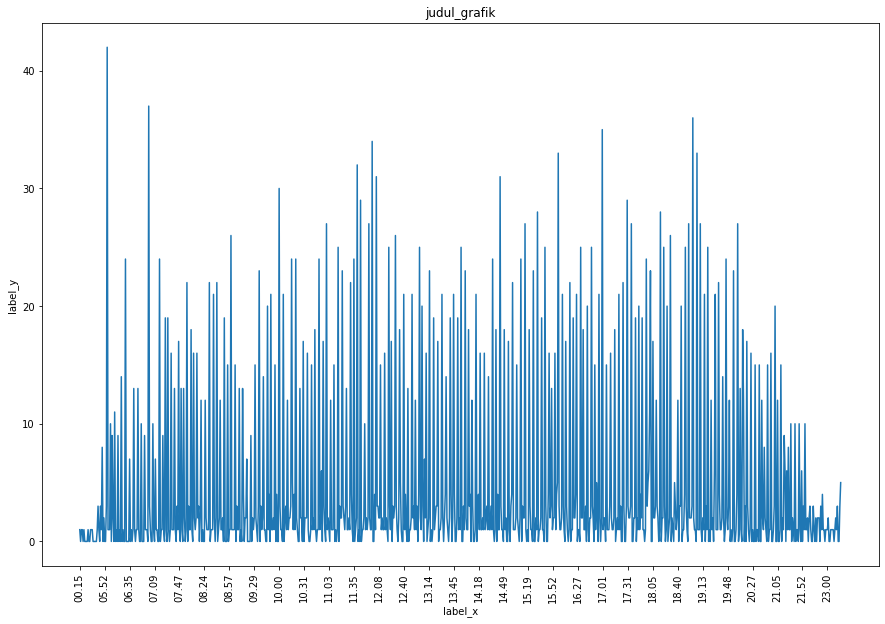

In [63]:
# 18. Mengatur ukuran gambar
plt.figure(figsize=(15, 10))

# 19. Melakukan plot data
Time_Flight_Count.plot()

# 20. Mengatur label sumbu x
ticks = range(0, len(Time_Flight_Count.index), 30)  # Menentukan posisi label setiap setengah jam
labels = Time_Flight_Count.index[ticks]  # Mengambil label berdasarkan posisi
plt.xticks(rotation=90) # Mengatur posisi rotasi label pada sumbu x
plt.xticks(ticks, labels)  # Mengatur posisi dan label pada sumbu x

# 21. Mengatur label sumbu x, y dan judul grafik
plt.xlabel('label_x')
plt.ylabel('label_y')
plt.title('judul_grafik')


# 22. Menampilkan grafik
plt.show()

In [64]:
df_cuy = pd.read_csv('dataset_tm_10k.csv')

In [65]:
df_cuy.isna().sum()

Flight            0
Time            873
Length         1343
Airline         582
AirportFrom       0
AirportTo         0
DayOfWeek         0
Class             0
dtype: int64

In [66]:
# Membuat variabel jumlah data yang akan dihapus secara random
jumlah_hapus = 3012

In [67]:
# Membuat variabel untuk menampung indeks dari data yang akan dihapus
indeks_hapus = df_cuy.sample(n=jumlah_hapus).index

In [68]:
df_cuy.loc[indeks_hapus, 'Time'] = None

In [69]:
# Menghitung nilai data yang kosong
df_cuy.isna().sum()

Flight            0
Time           3650
Length         1343
Airline         582
AirportFrom       0
AirportTo         0
DayOfWeek         0
Class             0
dtype: int64

In [70]:
# Menghitung persentase data yang kosong pada kolom "Length"
length_missdata_percentage = (df_cuy['Time'].isnull().sum() / df_cuy.shape[0]) * 100
length_missdata_percentage

33.83702604987485

In [71]:
# Melakukan imputasi pada data yang kosong dengan menggunakan imputasi rata-rata
meanImputation = df_cuy['Time'].mean() #Membuat variabel meanImputation untuk menampung nilai rata-rata dari kolom "Length"
meanImputation

802.1083088132268

In [72]:
df_cuy['Time'].fillna(meanImputation,
                    inplace=True)

In [73]:
jumlah_hapus = 632

In [74]:
indeks_hapus = df_cuy.sample(n=jumlah_hapus).index

In [75]:
# Membuat baris menjadi nilai None atau Menghapus baris sesuai dengan indeks yang dideklarasikan di variabel indeks_hapus dan pada kolom "Length"
df_cuy.loc[indeks_hapus, 'Time'] = None

In [76]:
# Mengecek nilai data yang kosong
df_cuy.isna().sum()

Flight            0
Time            632
Length         1343
Airline         582
AirportFrom       0
AirportTo         0
DayOfWeek         0
Class             0
dtype: int64

In [77]:
# Menghitung persentase data yang kosong pada kolom "Length"
length_missdata_percentage = (df_cuy['Time'].isnull().sum() / df_cuy.shape[0]) * 100
length_missdata_percentage

5.858904236581069

In [78]:
# Melakukan imputasi pada data yang kosong dengan menggunakan imputasi median
medianImputation = df_cuy['Time'].median()
medianImputation

802.1083088132268

In [79]:
# Mengisi nilai kosong dengan median
df_cuy['Time'].fillna(medianImputation, inplace=True)

In [80]:
# Mengecek data kosong pada kolom Length
df_cuy['Time'].isnull().any()

False

Clear Data NaN in Column Length

In [81]:
# Membuat variabel jumlah data yang akan dihapus secara random
jumlah_hapus = 3012

In [82]:
# Membuat variabel untuk menampung indeks dari data yang akan dihapus
indeks_hapus = df_cuy.sample(n=jumlah_hapus).index

In [83]:
df_cuy.loc[indeks_hapus, 'Length'] = None

In [84]:
df_cuy.isna().sum()

Flight            0
Time              0
Length         3985
Airline         582
AirportFrom       0
AirportTo         0
DayOfWeek         0
Class             0
dtype: int64

In [85]:
# Menghitung persentase data yang kosong pada kolom "Length"
length_missdata_percentage = (df_cuy['Length'].isnull().sum() / df_cuy.shape[0]) * 100
length_missdata_percentage

36.942616111986645

In [86]:
# Melakukan imputasi pada data yang kosong dengan menggunakan imputasi rata-rata
meanImputation = df_cuy['Length'].mean() #Membuat variabel meanImputation untuk menampung nilai rata-rata dari kolom "Length"
meanImputation

133.105998235813

In [87]:
df_cuy['Length'].fillna(meanImputation,
                    inplace=True)

In [88]:
jumlah_hapus = 632

In [89]:
indeks_hapus = df_cuy.sample(n=jumlah_hapus).index

In [90]:
# Membuat baris menjadi nilai None atau Menghapus baris sesuai dengan indeks yang dideklarasikan di variabel indeks_hapus dan pada kolom "Length"
df_cuy.loc[indeks_hapus, 'Length'] = None

In [91]:
# Mengecek nilai data yang kosong
df_cuy.isna().sum()

Flight           0
Time             0
Length         632
Airline        582
AirportFrom      0
AirportTo        0
DayOfWeek        0
Class            0
dtype: int64

In [92]:
# Menghitung persentase data yang kosong pada kolom "Length"
length_missdata_percentage = (df_cuy['Length'].isnull().sum() / df_cuy.shape[0]) * 100
length_missdata_percentage

5.858904236581069

In [93]:
# Melakukan imputasi pada data yang kosong dengan menggunakan imputasi median
medianImputation = df_cuy['Length'].median()
medianImputation

133.105998235813

In [94]:
# Mengisi nilai kosong dengan median
df_cuy['Length'].fillna(medianImputation, inplace=True)

In [95]:
# Mengecek data kosong pada kolom Length
df_cuy['Length'].isnull().any()

False

Data Modeling

Linear Regression

In [96]:
# Import Library
import pandas as pd

In [97]:
# Membuang Kolom "Flight"
df_cuy = df_cuy.iloc[:,1:]

In [98]:
df_cuy.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,802.108309,133.105998,NaN,IAH,PHX,5,0
1,802.108309,66.000000,OO,DSM,MKE,2,0
2,802.108309,133.105998,DL,SEA,CVG,7,0
3,595.000000,133.105998,WN,SNA,MDW,7,1
4,530.000000,133.105998,CO,IAH,MCO,6,1


In [99]:
# Scaling
from sklearn.preprocessing import RobustScaler

In [100]:
scaler = RobustScaler()
df_cuy[['Time','Length']] = scaler.fit_transform(df_cuy[['Time','Length']])
df_cuy.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.000000,0.000000,NaN,IAH,PHX,5,0
1,0.000000,-2.228991,OO,DSM,MKE,2,0
2,0.000000,0.000000,DL,SEA,CVG,7,0
3,-1.141093,0.000000,WN,SNA,MDW,7,1
4,-1.499219,0.000000,CO,IAH,MCO,6,1


In [101]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df_cuy[['Time']]
y = df_cuy['Class']

In [102]:
# Membagi dataset ke data latih dan data uji

# Import fungsi train_test_split untuk membagi data dari libray sklearn dan modul model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [103]:
# Memanggil fungsi LinearRegression
from sklearn.linear_model import LinearRegression

In [104]:
# Memanggil objek LinearRegression ke dalam variabel mlr
lr = LinearRegression()  

# Melatih model
lr.fit(X_train, y_train)

LinearRegression()

In [105]:
# Memprediksi model
y_pred_lr = lr.predict(X_test)
# Nilai prediksi
print("Prediction for test set: {}".format(y_pred_lr))

Prediction for test set: [0.45170487 0.44753606 0.53647609 ... 0.45170487 0.45170487 0.49017854]


In [106]:
# Membandingkan nilai sebenarnya dengan nilai prediksi menggunakan linear regression
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lr})
lr_diff.head()

,Actual value,Predicted value
7823,1,0.451705
6132,0,0.447536
9949,0,0.536476
10440,0,0.519175
9097,1,0.448754


In [107]:
# Menerapkan threshold pada variabel y_pred_lr ke dalam variabel y_predict_class
y_predict_class = [1 if prob > 0.5 else 0 for prob in y_pred_lr]

In [108]:
# Import Library
from sklearn.metrics import accuracy_score

# Menghitung Akurasi
print("Accuracy:"
      , round(accuracy_score(y_test, y_predict_class), 3)) # Membulatkan nilai akurasi menjadi tiga angka di belakang koma

Accuracy: 0.562


Logistic Regression

In [109]:
# Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Airline','AirportFrom','AirportTo','DayOfWeek']

In [110]:
# Encoding Kolom Kategori
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cuy[cat_col] = df_cuy[cat_col].apply(le.fit_transform)

In [111]:
df_cuy.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.000000,0.000000,18,125,199,4,0
1,0.000000,-2.228991,12,76,170,1,0
2,0.000000,0.000000,5,235,64,6,0
3,-1.141093,0.000000,15,245,162,6,1
4,-1.499219,0.000000,4,125,160,5,1


In [112]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df_cuy.iloc[:,0:-1].values
y = df_cuy.iloc[:,-1].values

In [113]:
# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [114]:
# Membuat Model - LogisticRegression
from sklearn.linear_model import LogisticRegression

In [115]:
reg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [116]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [117]:
df_cuy.isna().sum()

Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [118]:
# Membuat Confusion Matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1434,  389],
       [1015,  399]])

Text(0.5, 257.44, 'Predicted label')

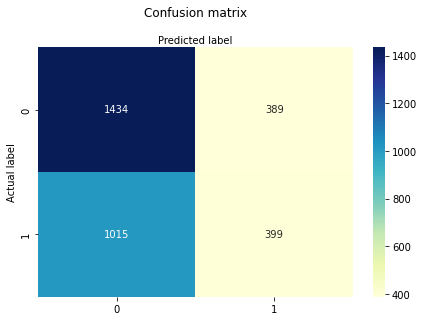

In [119]:
# Visualisasi Confusion Matrix dengan Heatmap

# Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # Label kelas yang akan ditampilkan pada sumbu x dan y
fig, ax = plt.subplots() #Membuat objek gambar dan sumbu menggunakan
tick_marks = np.arange(len(class_names)) # Membuat array dengan rentang jumlah kelas yang ada

# Menentukan tanda-tanda pada sumbu x dan y sesuai dengan array yang telah dibuat
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Membuat Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix) #Parameter yang akan divisualisasi 
            , annot=True # Menampilkan nilai di dalam kotak heatmap
            , cmap="YlGnBu" # Skema warna pada heatmap, "YlGnBu" adalah kombinasi antara Yellow (Kuning), Green (Hijau), dan Blue (Biru).
            ,fmt='g') #Mengatur format angka menjadi notasi umum (general notation)

# Mengatur posisi label sumbu x ke bagian atas heatmap
ax.xaxis.set_label_position("top")

# Mengatur tampilan grafik agar lebih rapi.
plt.tight_layout()

# Mengatur judul grafik, label pada sumbu y dan x
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [120]:
# Import library
from sklearn.metrics import classification_report

# Mendefinisikan nama kelas dalam array
target_names = ['Not Delayed', 'Delayed']

print(classification_report(y_test # Array target yang berisi label aktual 
                            , y_pred # Array target yang berisi label prediksi
                            , target_names=target_names)) #Memberikan nama kelas yang akan ditampilkan

              precision    recall  f1-score   support

 Not Delayed       0.59      0.79      0.67      1823
     Delayed       0.51      0.28      0.36      1414

    accuracy                           0.57      3237
   macro avg       0.55      0.53      0.52      3237
weighted avg       0.55      0.57      0.54      3237



In [121]:
import matplotlib.pyplot as plt

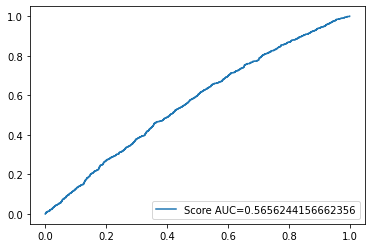

In [122]:
# Memperoleh probabilitas prediksi kelas positif (y=1) dari model klasifikasi reg untuk data uji (X_test)
y_pred_proba = reg.predict_proba(X_test)[::,1]

# Menghitung false positive rate (fpr), true positive rate (tpr), dan threshold yang terkait dengan kurva ROC.
fpr, tpr, _ = metrics.roc_curve(y_test, #Label aktual  
                                y_pred_proba)

# Menghitung nilai AUC dari kurva ROC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Membuat plot untuk kurva ROC
plt.plot(fpr,tpr
         ,label="Score AUC="+str(auc)) #Label "Score AUC" ditambahkan ke legenda untuk menampilkan nilai AUC di grafik

# Menampilkan legenda di lokasi keempat (kanan bawah) pada grafik
plt.legend(loc=4)

# Menampilkan grafik
plt.show()

K-NN

In [123]:
# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [124]:
# Membuat Model - Import Library
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [125]:
knn = KNeighborsClassifier(n_neighbors= 3) # Menentukan jumlah tetangga terdekat (nearest neighbors)

# Melatih model
knn.fit(X_train, y_train)

# Melakukan validasi silang dengan membagi data pelatihan menjadi 5 lipatan (folds)
k = KFold(n_splits = 5)

# Menghitung skor akurasi untuk setiap lipatan menggunakan metode validasi silang yang telah ditentukan
score = cross_val_score(knn
                        , X_train, y_train
                        , scoring = 'accuracy' #Parameter yang ingin digunakan
                        , cv = k).mean() # cv=k -> jumlah lipatan, .mean() -> menghitung rata-rata skor akurasi  

# Mencetak skor akurasi pada set data pelatihan dengan pembulatan ke 3 desimal
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.553


In [126]:
y_pred = knn.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.554


In [127]:
from sklearn.metrics import classification_report
target_names = ['Not Delayed', 'Delayed'] 
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Delayed       0.60      0.61      0.60      1823
     Delayed       0.49      0.49      0.49      1414

    accuracy                           0.55      3237
   macro avg       0.55      0.55      0.55      3237
weighted avg       0.55      0.55      0.55      3237



In [128]:
# Membuat list kosong dalam variabel accuracy
accuracy = []

# Membuat loop dengan rentang nilai i dari 1-14 (Exclude 15)
# Loop akan menguji setiap n dari 1-14 untuk mencari n dengan akurasi yang paling tinggi

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)
    
    # Menyimpan skor akurasi pada setiap iterasi ke dalam list "accuracy" 
    accuracy.append(accuracy_i)

In [129]:
import matplotlib.pyplot as plt

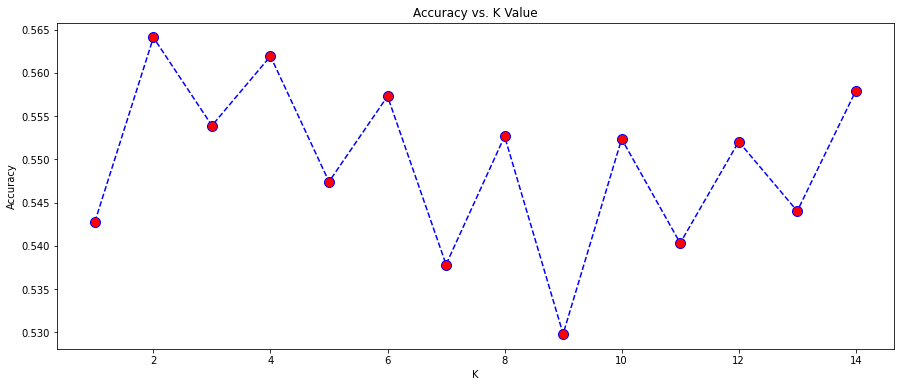

In [130]:
# Melihat akurasi dari setiap iterasi pada line chart
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [131]:
# Dapat dilihat dari grafik di atas bahwa akurasi paling tinggi didapatkan dengan n = 14
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [132]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {round(accuracy * 100, 2)}%")

Accuracy on the test set: 56.19%


In [133]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Delayed       0.59      0.76      0.66      1823
     Delayed       0.50      0.30      0.38      1414

    accuracy                           0.56      3237
   macro avg       0.54      0.53      0.52      3237
weighted avg       0.55      0.56      0.54      3237



In [134]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

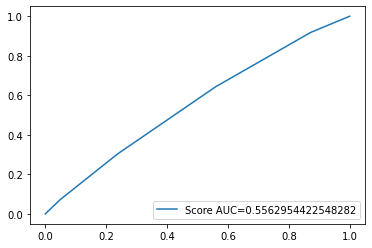

In [135]:
# Memperoleh probabilitas prediksi kelas positif (y=1) dari model klasifikasi KNN untuk data uji (X_test)
y_pred_proba = knn.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Score AUC="+str(auc))
plt.legend(loc=4)
plt.show()

KNN Method

In [136]:
# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [137]:
# Membuat Model - Import Library
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [138]:
# Import library Cupy
import cupy as cp

In [139]:
cp.cuda.is_available()

True

In [140]:
# Membuat ANN
class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.num_hidden_layers = len(hidden_sizes)

        # Inisialisasi bobot secara acak dengan mean 0
        self.weights = []
        input_dim = input_size
        for hidden_size in hidden_sizes:
            self.weights.append(cp.random.randn(input_dim, hidden_size))
            input_dim = hidden_size
        self.weights.append(cp.random.randn(input_dim, output_size))

    def sigmoid(self, x):
        return 1 / (1 + cp.exp(-x))

    def forward(self, X):
        self.z_values = []
        input_data = X

        for weight in self.weights:
            z = cp.dot(input_data, weight)
            input_data = self.sigmoid(z)
            self.z_values.append(z)

        return input_data

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def backward(self, X, y, y_hat, learning_rate):
        deltas = [None] * (self.num_hidden_layers + 1)
        error = y - y_hat
        delta_output = error * self.sigmoid_derivative(y_hat)
        deltas[self.num_hidden_layers] = delta_output

        for i in range(self.num_hidden_layers, 0, -1):
            error_hidden = cp.dot(deltas[i], self.weights[i].T)
            delta_hidden = error_hidden * self.sigmoid_derivative(self.z_values[i-1])
            deltas[i-1] = delta_hidden

        for i in range(self.num_hidden_layers, -1, -1):
            if i == self.num_hidden_layers:
                self.weights[i] += cp.dot(self.z_values[i-1].T, deltas[i]) * learning_rate
            elif i == 0:
                self.weights[i] += cp.dot(X.T, deltas[i]) * learning_rate
            else:
                self.weights[i] += cp.dot(self.z_values[i-1].T, deltas[i]) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        X = cp.array(X)
        y = cp.array(y)

        for i in range(epochs):
            y_hat = self.forward(X)
            self.backward(X, y, y_hat, learning_rate)
            loss = cp.mean(cp.square(y - y_hat))
            if i % 100 == 0:
                print(f"Epoch {i}: loss = {loss}")

    def predict(self, X):
        X = cp.array(X)
        y_hat = self.forward(X)
        return y_hat.get()


In [141]:
input_size = X_train.shape[1]
hidden_size = [5,5] # 2 Hidden layer dengan masing-masing 5 neuron / unit
output_size = len(cp.unique(y_train))
epochs = 3000
learning_rate = 0.5

# Membangun dan melatih jaringan saraf tiruan
model = NeuralNetwork(input_size, hidden_size, output_size)

In [142]:
X_train.shape[1]

6

In [143]:
len(cp.unique(y_train))

2

In [144]:
# Library untuk menghitung waktu eksekusi / waktu yang dibutuhkan program ketika berjalan sampai selesai
import time

In [145]:
# Melatih model
start_time = time.time()
model.train(X_train, y_train.reshape(-1, 1), epochs, learning_rate)
end_time = time.time()

execution_time = end_time - start_time
print("Waktu eksekusi kode :", round(execution_time,2), "detik")

Epoch 0: loss = 0.29166875956733124
Epoch 100: loss = 0.5478145695364238
Epoch 200: loss = 0.5478145695364238
Epoch 300: loss = 0.5478145695364238
Epoch 400: loss = 0.5478145695364238
Epoch 500: loss = 0.5478145695364238
Epoch 600: loss = 0.5478145695364238
Epoch 700: loss = 0.5478145695364238
Epoch 800: loss = 0.5478145695364238
Epoch 900: loss = 0.5478145695364238
Epoch 1000: loss = 0.5478145695364238
Epoch 1100: loss = 0.5478145695364238
Epoch 1200: loss = 0.5478145695364238
Epoch 1300: loss = 0.5478145695364238
Epoch 1400: loss = 0.5478145695364238
Epoch 1500: loss = 0.5478145695364238
Epoch 1600: loss = 0.5478145695364238
Epoch 1700: loss = 0.5478145695364238
Epoch 1800: loss = 0.5478145695364238
Epoch 1900: loss = 0.5478145695364238
Epoch 2000: loss = 0.5478145695364238
Epoch 2100: loss = 0.5478145695364238
Epoch 2200: loss = 0.5478145695364238
Epoch 2300: loss = 0.5478145695364238
Epoch 2400: loss = 0.5478145695364238
Epoch 2500: loss = 0.5478145695364238
Epoch 2600: loss = 0.54

In [146]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

In [147]:
# Melihat tipe data pada variabel y_pred
y_pred.dtype

dtype('float64')

In [148]:
# Menggunakan np.unique() dan np.bincount() untuk menghitung value counts
unique_values, value_counts = cp.unique(y_pred, return_counts=True)

# Cetak value counts / jumlah nilai pada variabel y_pred
for value, count in zip(unique_values, value_counts):
    print(f"Nilai: {value}, Jumlah: {count}")

Nilai: 1.0, Jumlah: 6474


In [149]:
y_pred_label = (y_pred >= 0.5).astype(int)

In [150]:
# Menggunakan np.unique() dan np.bincount() untuk menghitung value counts
unique_values, value_counts = cp.unique(y_pred_label, return_counts=True)

# Cetak value counts
for value, count in zip(unique_values, value_counts):
    print(f"Nilai: {value}, Jumlah: {count}")

Nilai: 1, Jumlah: 6474


In [151]:
from sklearn.metrics import accuracy_score

In [152]:
# Menghitung akurasi model dalam klasifikasi masing-masing kelas 0 dan 1
y_pred_label_0 = (y_pred[:, 1] < 0.5).astype(int)
y_pred_label_1 = (y_pred[:, 1] >= 0.5).astype(int)

accuracy_label_0 = accuracy_score(y_test, y_pred_label_0)
accuracy_label_1 = accuracy_score(y_test, y_pred_label_1)

print("Akurasi model untuk label 0: ", accuracy_label_0)
print("Akurasi model untuk label 1: ", accuracy_label_1)

Akurasi model untuk label 0:  0.56317578004325
Akurasi model untuk label 1:  0.4368242199567501


In [153]:
# Melihat akurasi model dalam melakukan klasifikasi kelas 0 dan 1 secara gabungan / bersamaan
y_test_label_0 = y_test
y_test_label_1 = y_test

In [154]:
y_pred_combined = cp.hstack((y_pred_label[:, 0], y_pred_label[:, 1]))
y_test_combined = cp.hstack((y_test_label_0, y_test_label_1))

In [155]:
accuracy_combined = accuracy_score(y_test_combined.get(), y_pred_combined.get())
print(accuracy_combined)

0.4368242199567501


In [156]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Menghitung precision
precision = precision_score(y_test_combined.get(), y_pred_combined.get(), average=None)
print("Precision untuk kelas 0:", precision[0])
print("Precision untuk kelas 1:", precision[1])

# Menghitung recall
recall = recall_score(y_test_combined.get(), y_pred_combined.get(), average=None)
print("Recall untuk kelas 0:", recall[0])
print("Recall untuk kelas 1:", recall[1])

# Menghitung F1-score
f1 = f1_score(y_test_combined.get(), y_pred_combined.get(), average=None)
print("F1-score untuk kelas 0:", f1[0])
print("F1-score untuk kelas 1:", f1[1])


Precision untuk kelas 0: 0.0
Precision untuk kelas 1: 0.4368242199567501
Recall untuk kelas 0: 0.0
Recall untuk kelas 1: 1.0
F1-score untuk kelas 0: 0.0
F1-score untuk kelas 1: 0.6080412814448506


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
